## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

# Part 1. Linear regression model

## Load regression data

In [2]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

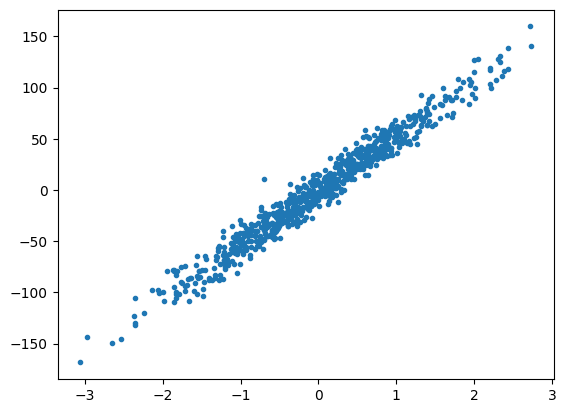

In [3]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
trainloss = []
def Mean_square_error(test, pred):
    square_err = (test-pred)**2
    return square_err.sum()*0.5*(1/len(test))

def predict(x,b0,b1):
  return b0+b1*x
def gradiDes():
  time = 800
  b0 = 0
  b1 = 0
  Lrate = 0.05
  
  for i in range(time):
    ypred = np.array([])
    ypred = b0+b1*x_train
    b0 = b0 - (Lrate * np.sum(y_train-ypred) * float(-1/len(x_train)) )
    b1 = b1 - (Lrate * np.sum((y_train-ypred)*x_train) * float(-1/len(x_train)) )
    trainloss.append(Mean_square_error(y_train,ypred))
  return b0,b1
x_train = np.reshape(x_train, x_train.size)
x_test = np.reshape(x_test, x_test.size)
b0,b1 = gradiDes()
print("b0: ",b0,"b1: ",b1)


b0:  -0.33375889502567796 b1:  52.743540461824786


## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

Mean_square_error:  55.21909628061997


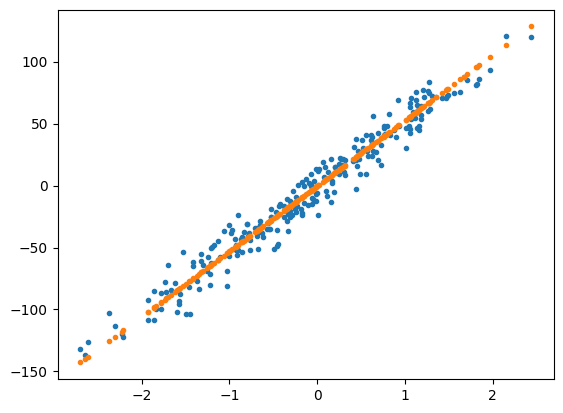

In [5]:
y_pred = predict(x_test,b0,b1)
print("Mean_square_error: ",Mean_square_error(y_test, y_pred))
#plt.plot(x_train,y_train,'.') 
plt.plot(x_test,y_test,'.') 
plt.plot(x_test, y_pred, '.')  # regression line

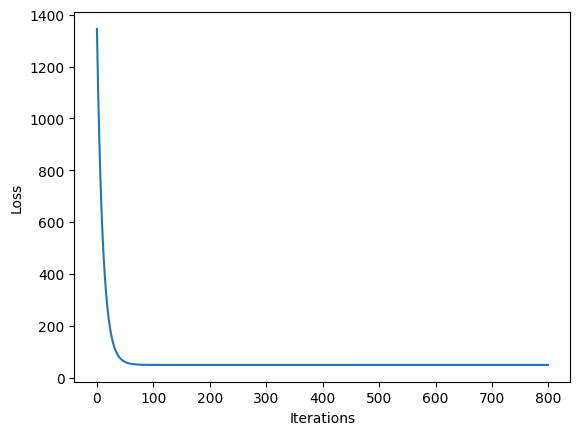

In [6]:
plt.plot(np.arange(len(trainloss)), trainloss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

# Part 2. Logistic regreesion model

## Load classification data

In [7]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

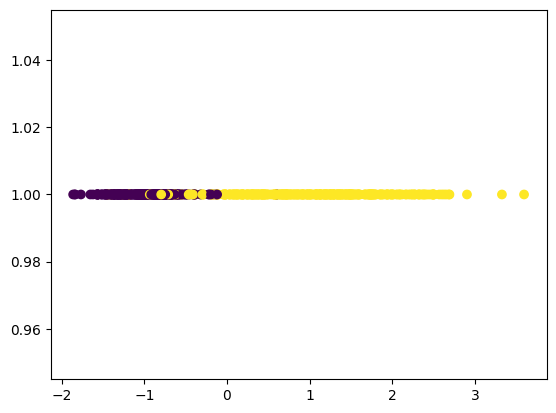

In [8]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [9]:
x_train = np.reshape(x_train, x_train.size)
x_test = np.reshape(x_test, x_test.size)
trainloss_lo = []
def Cross_entropy_error(test, pred):
    return -np.sum(test*np.log(pred)+(1-test)*np.log(1-pred))

def predict_lo(x,b0,b1):
  a = b0+b1*x
  return 1/(1+np.exp(a*(-1)))
def gradiDes_lo():
  time = 1000
  b0 = 0
  b1 = 0
  Lrate = 0.05
  
  for i in range(time):
    ypred = predict_lo(x_train,b0,b1)
    b0 = b0 - (Lrate * np.sum(y_train-ypred) * float(-1/len(x_train)) )
    b1 = b1 - (Lrate * np.sum((y_train-ypred)*x_train) * float(-1/len(x_train)) )
    trainloss_lo.append(Cross_entropy_error(y_train,ypred))
  return b0,b1
b0,b1 = gradiDes_lo()
print("b0: ",b0,"b1: ",b1)

b0:  0.7365083362524347 b1:  3.239820397263054


Cross_entropy_error:  45.225920481381024


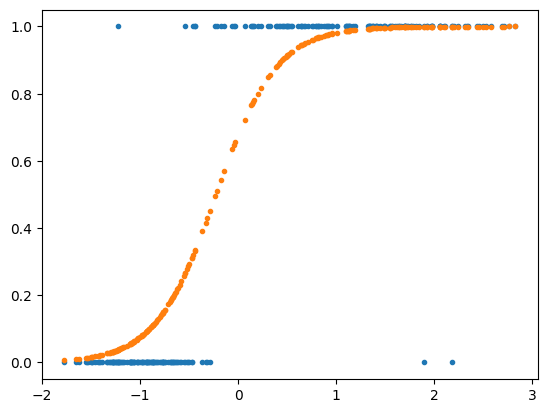

In [10]:
y_pred = predict_lo(x_test,b0,b1)
print("Cross_entropy_error: ",Cross_entropy_error(y_test, y_pred))
#plt.plot(x_train,y_train,'.') 
plt.plot(x_test,y_test,'.') 
plt.plot(x_test, y_pred, '.')  # regression line

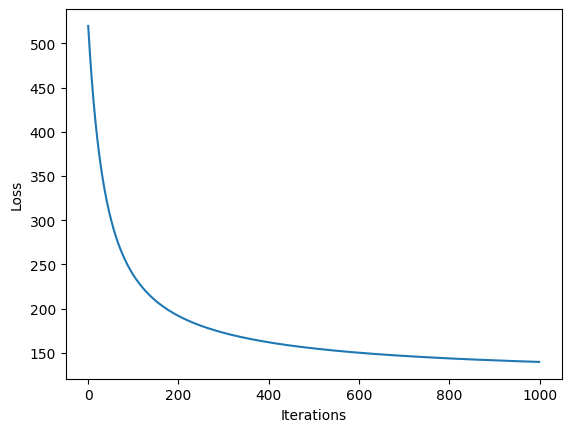

In [11]:
plt.plot(np.arange(len(trainloss_lo)), trainloss_lo)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()